In [ ]:
%load_ext rpy2.ipython

#**<font color='brown'>Criando Árvore de Decisão a partir do dataset Titanic**

## Gerando Dataset



In [29]:
%%R
data(Titanic, package = "datasets") 
dataset <- as.data.frame(Titanic) 
#View(dataset)
head(dataset)

  Class    Sex   Age Survived Freq
1   1st   Male Child       No    0
2   2nd   Male Child       No    0
3   3rd   Male Child       No   35
4  Crew   Male Child       No    0
5   1st Female Child       No    0
6   2nd Female Child       No    0


##Carregando o pacote

In [ ]:
%%R
install.packages("rpart")
library(rpart) 

##Criando o modelo

In [23]:
%%R
titanic_tree <- rpart(Survived ~ Class + Sex + Age, 
                      data = dataset, 
                      weights = Freq, # Coluna frequência como peso p/ definição dos nós de uma árvore
                      method = "class", 
                      parms = list(split = "information"), 
                      control = rpart.control(minsplit = 5)) 
titanic_tree

n= 32 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 32 711 No (0.6769650 0.3230350)  
   2) Sex=Male 16 367 No (0.7879838 0.2120162)  
     4) Age=Adult 8 338 No (0.7972406 0.2027594) *
     5) Age=Child 8  29 No (0.5468750 0.4531250)  
      10) Class=3rd 2  13 No (0.7291667 0.2708333) *
      11) Class=1st,2nd 4   0 Yes (0.0000000 1.0000000) *
   3) Sex=Female 16 126 Yes (0.2680851 0.7319149)  
     6) Class=3rd 4  90 No (0.5408163 0.4591837) *
     7) Class=1st,2nd,Crew 12  20 Yes (0.0729927 0.9270073) *


##Aplicando Prune

In [24]:
%%R
?prune
pruned_titanic_tree <- prune(titanic_tree, cp = 0.02)
pruned_titanic_tree

n= 32 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 32 711 No (0.6769650 0.3230350)  
  2) Sex=Male 16 367 No (0.7879838 0.2120162) *
  3) Sex=Female 16 126 Yes (0.2680851 0.7319149)  
    6) Class=3rd 4  90 No (0.5408163 0.4591837) *
    7) Class=1st,2nd,Crew 12  20 Yes (0.0729927 0.9270073) *


## Carregando o pacote rpart.plot


In [ ]:
%%R
install.packages("rpart.plot")
library(rpart.plot) 

#**<font color='red'>Imprimindo Árvore antes e depois do Prune**

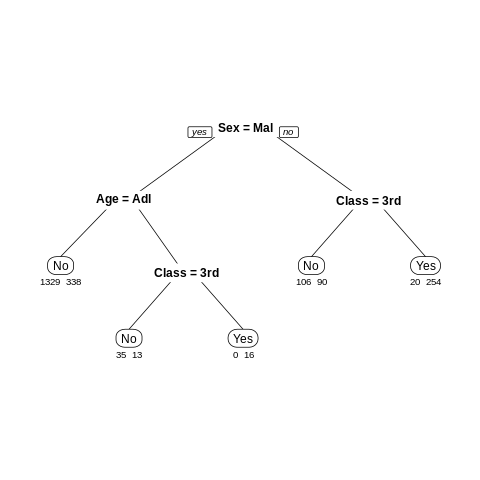

In [26]:
%%R
# Antes do Pruning
prp(titanic_tree, type = 0, extra = 1, under = TRUE, compress = TRUE)

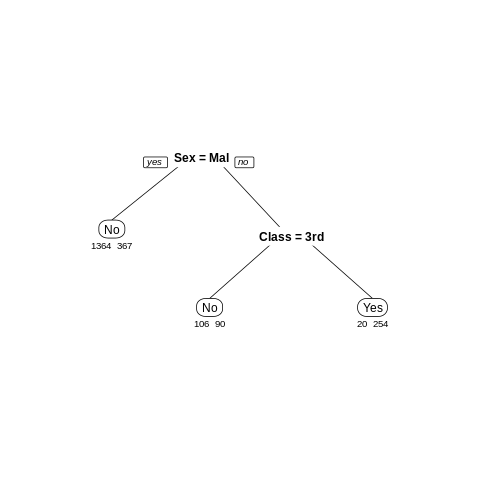

In [27]:
%%R
# Depois do Pruning
prp(pruned_titanic_tree, type = 0, extra = 1, under = TRUE, compress = TRUE)